<a href="https://colab.research.google.com/github/Prithviraj2706/DataScience-Assignment/blob/main/Random_Forest_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
data=pd.read_csv('/content/Fraud_check.csv')

EDA

In [ ]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
data.shape

(600, 6)

In [ ]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [ ]:
data.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [ ]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
data['Undergrad'].unique()

array(['NO', 'YES'], dtype=object)

In [ ]:
data['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [ ]:
data['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [ ]:
#converting datatype to category
data[['Undergrad','Marital.Status','Urban']]=data[['Undergrad','Marital.Status','Urban']].astype('category')

In [ ]:
#Label Encoding
data['Undergrad']=data['Undergrad'].cat.codes
data['Marital.Status']=data['Marital.Status'].cat.codes
data['Urban']=data['Urban'].cat.codes

In [ ]:
#classifying numerical data accordingly
data['Tax.Inc'] = pd.cut(data['Taxable.Income'], bins=[-float('inf'), 30000, float('inf')], labels=['Risky', 'Good'])
data['Tax.Inc']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Tax.Inc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [ ]:
#dropping the previous unnecessary column
data=data.drop('Taxable.Income',axis=1)
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax.Inc
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


Visualisation

array([[<Axes: title={'center': 'Undergrad'}>,
        <Axes: title={'center': 'Marital.Status'}>],
       [<Axes: title={'center': 'City.Population'}>,
        <Axes: title={'center': 'Work.Experience'}>],
       [<Axes: title={'center': 'Urban'}>, <Axes: >]], dtype=object)

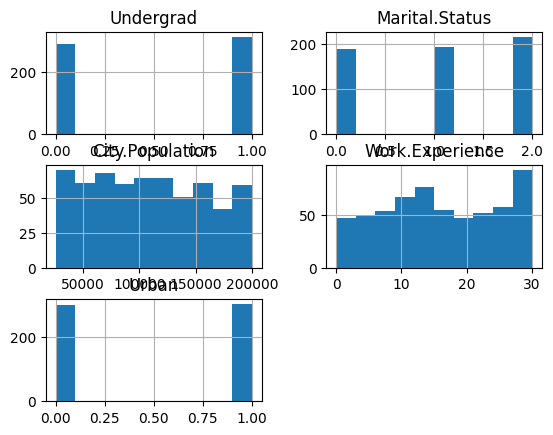

In [ ]:
data.hist()

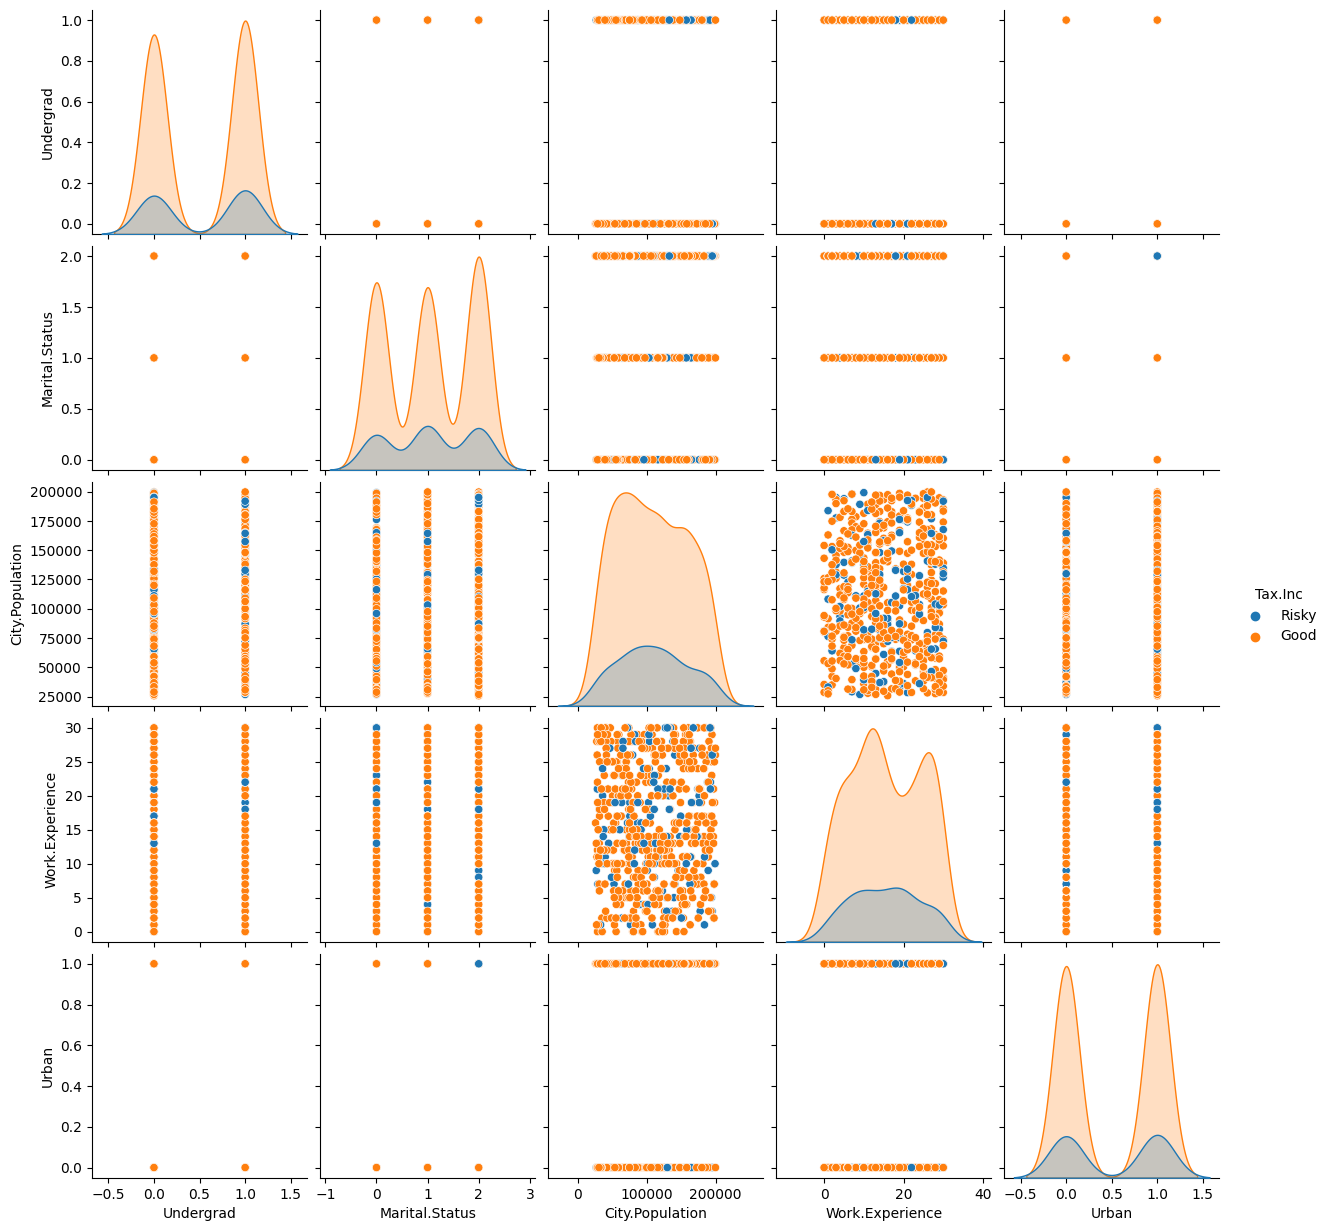

In [ ]:
sns.pairplot(data=data, hue = 'Tax.Inc')

In [ ]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
data_norm = norm_func(data.iloc[:,0:5])
data_norm.tail(10)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
590,0.0,0.5,0.341473,0.466667,1.0
591,1.0,1.0,0.615406,0.600000,1.0
592,1.0,1.0,0.283703,0.533333,0.0
593,0.0,0.0,0.610256,0.333333,1.0
594,0.0,0.5,0.412341,0.300000,1.0
595,1.0,0.0,0.078811,0.233333,1.0
596,1.0,0.0,0.170058,0.066667,1.0
597,0.0,0.0,0.737240,0.000000,1.0
598,1.0,0.5,0.886810,0.566667,0.0
599,0.0,0.0,0.760683,0.533333,0.0


In [ ]:
x=data_norm
y=data.iloc[:,-1]

Model

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23)

In [ ]:
#GridSearch CV
parameters={'criterion':['entropy','gini'],'max_depth':[10,15,20,25,30,35,40,45,50,55,60],'n_estimators':[50,100,150,200,250,300,350,400]}
model1=RandomForestClassifier()
gridsv=GridSearchCV(model1,param_grid=parameters,scoring='accuracy',cv=5)
rf1=gridsv.fit(x_train,y_train)

In [ ]:
print(rf1.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 300}


In [ ]:
print(rf1.best_score_)

0.7554464703132304


In [ ]:
model2=RandomForestClassifier(criterion= 'entropy', max_depth= 10, n_estimators=300)
rf2=model2.fit(x_train,y_train)

In [ ]:
y_pred=rf2.predict(x_test)
y_pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good'

In [ ]:
print("Accuracy Score is",np.round(accuracy_score(y_pred,y_test),2)*100,'%')

Accuracy Score is 79.0 %


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

        Good       0.93      0.84      0.88       130
       Risky       0.00      0.00      0.00         8

    accuracy                           0.79       138
   macro avg       0.47      0.42      0.44       138
weighted avg       0.88      0.79      0.83       138

